## Imports

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, learning_curve


In [2]:
model = LinearRegression()


# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [72]:
# YOUR CODE HERE
nba_data_raw = pd.read_csv('NBA.csv')
nba_data_raw.head()


,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


In [4]:
# Shuffling the data
nba_data_shuffle = nba_data_raw.sample(frac=1)
nba_data_shuffle.head()

,season,poss,mp,do_ratio,pacing,win_rating
2361,2016,4829,2407,0.282348,-0.630657,3.995039
138,1990,6813,3369,1.186551,-0.521108,7.457189
163,2001,2967,1571,-1.091886,-0.464924,1.632345
3008,2016,3484,1791,-1.824933,-1.061910,3.423995
2492,1988,71,33,-15.473011,5.432167,-0.341134


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [5]:
##Let's start simple by modeling the SalePrice (y) according to the GrLivArea (X).
livecode_nba = nba_data_shuffle[['win_rating', 'mp']]

livecode_nba.head()

,win_rating,mp
2361,3.995039,2407
138,7.457189,3369
163,1.632345,1571
3008,3.423995,1791
2492,-0.341134,33


👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

In [6]:
# YOUR CODE HERE
X = nba_data_raw[['mp']]
y = nba_data_raw['win_rating']

In [7]:
livecode_nba = nba_data_raw[['win_rating', 'mp']]

# Displaying the first few rows of livecode_nba DataFrame
print(livecode_nba.head())


   win_rating    mp
0    1.643091  2409
1   10.808427  2708
2    3.054773  2407
3    0.230004   585
4    0.905614  2056


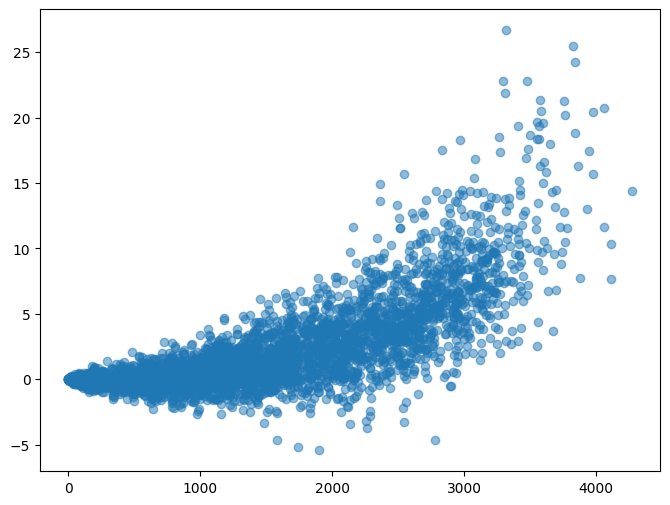

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(nba_data_raw['mp'], nba_data_raw['win_rating'], alpha=0.5)

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [9]:
cv_results = cross_validate(model, X, y, cv=5)
print(cv_results)


{'fit_time': array([0.00247812, 0.00085902, 0.0010252 , 0.00090098, 0.00070071]), 'score_time': array([0.00055099, 0.00201106, 0.00054574, 0.00048804, 0.00045633]), 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}


❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [10]:

test_scores = cv_results['test_score']
min_score = min(test_scores)
print(min_score)


0.5344790822272503


❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [11]:

max_scoretest_scores = cv_results['test_score']
max_score = max(test_scores)

❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [18]:
# YOUR CODE HERE
test_scores = cv_results['test_score']

# Computing the mean score
mean_score = test_scores.mean()


ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [13]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/pablolizardi/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/pablolizardi/code/eltoski3030/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [15]:
y

0        1.643091
1       10.808427
2        3.054773
3        0.230004
4        0.905614
          ...    
3995     0.082828
3996     3.542416
3997     0.787185
3998    -0.312601
3999     5.380485
Name: win_rating, Length: 4000, dtype: float64

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time
mean_scores = []
total_times = []


for k in range(2, 21):
    start_time = time.time()
    model.fit(X, y)
    cv_results = cross_validate(model, X, y, cv=k)
    mean_score = np.mean(cv_results['test_score'])

    end_time = time.time()
    total_time = np.sum(cv_results['fit_time']) + np.sum(cv_results['score_time'])

    mean_scores.append(mean_score)
    total_times.append(total_time)


In [22]:
type(mean_scores)

list

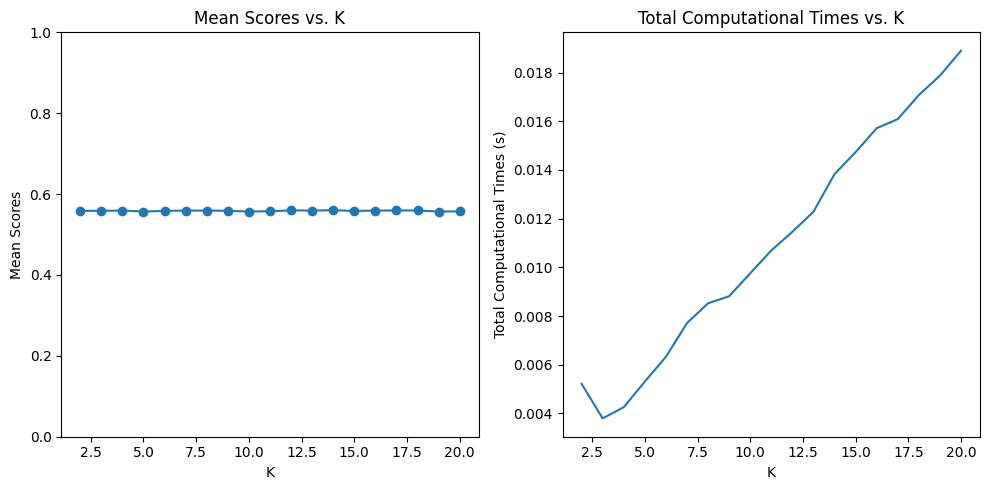

In [26]:
plt.figure(figsize=(10, 5))

# Plot Mean Scores
plt.subplot(1, 2, 1)
plt.plot(range(2, 21), mean_scores, marker='o')
plt.title('Mean Scores vs. K')
plt.xlabel('K')
plt.ylabel('Mean Scores')
plt.ylim(0,1)

# Plot Total Computational Times
plt.subplot(1, 2, 2)
plt.plot(range(2, 21), total_times)
plt.title('Total Computational Times vs. K')
plt.xlabel('K')
plt.ylabel('Total Computational Times (s)')

plt.tight_layout()
plt.show()


ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [27]:
model.fit(X, y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [42]:
# YOUR CODE HERE
s = model.coef_
slope = s[0]
slope


0.0026025799386401927

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [43]:
# YOUR CODE HERE
intercept = model.intercept_
intercept

-1.546374937163944

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [45]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/pablolizardi/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/pablolizardi/code/eltoski3030/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [48]:
minutes_played = 1000
prediction = model.predict([[minutes_played]])
prediction

/Users/pablolizardi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.056205])

### ☑️ Test your code

In [47]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/pablolizardi/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/pablolizardi/code/eltoski3030/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

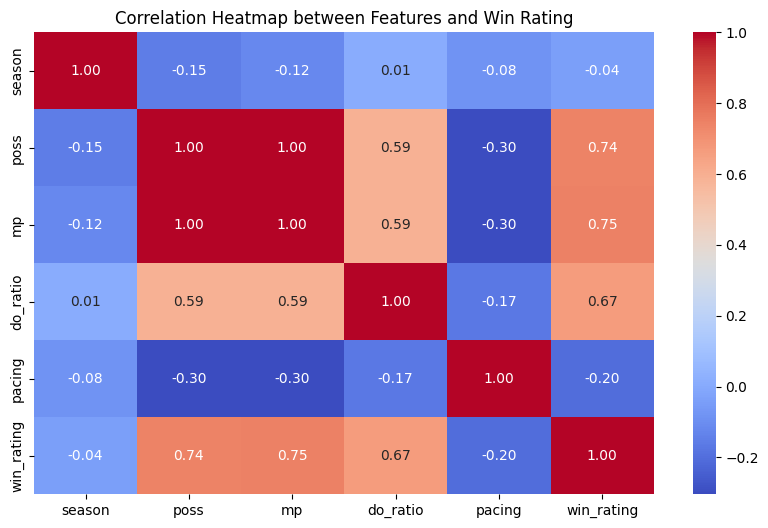

In [63]:
features_to_visualize = ['season', 'poss', 'mp', 'do_ratio', 'pacing']

correlation_matrix = nba_data_raw[['season', 'poss', 'mp', 'do_ratio', 'pacing', 'win_rating']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Features and Win Rating')
plt.show()

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [54]:
nba_data_raw.keys()

Index(['season', 'poss', 'mp', 'do_ratio', 'pacing', 'win_rating'], dtype='object')

In [60]:
new_features = nba_data_raw[['do_ratio', 'mp']]
new_features

,do_ratio,mp
0,-1.546275,2409
1,0.996587,2708
2,0.242598,2407
3,-1.343806,585
4,-1.813990,2056
...,...,...
3995,-1.761425,565
3996,0.907199,1785
3997,0.848178,378
3998,-6.298906,156


❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [67]:
X_new = nba_data_raw[['do_ratio', 'mp']]
y_new = nba_data_raw['win_rating']


mean_2_feat_score = cross_val_score(model, X_new, y_new, cv=5).mean()
mean_2_feat_score

0.6317728310765246

### ☑️ Test your code

In [68]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/pablolizardi/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/pablolizardi/code/eltoski3030/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁